In [1]:
#Importing the library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For the Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#For the decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#For the Decisiontree calibration 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Decision Tree analysis
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Importing the dataset

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,y,Astronomical_Tide+6,Burano_Average_Tide_Level,DS_Lido_Average_Tide_Level,Misericordia_Average_Tide_Level,P_Salute_Average_Tide_Level,Piattaforma_CNR_Average_Tide_Level,Faro_Diga_Lido_Average_Wind_Direction,Misericordia_Average_Wind_Direction,San_Giorgio_Average_Wind_Direction,...,P_Salute_Water_Temperature,Piattaforma_CNR_Water_Temperature,Palazzo_Cavalli_Pressure,Piattaforma_CNR_Pressure,Misericordia_Significant_Wave_Height,Piattaforma_CNR_Significant_Wave_Height,Misericordia_Max_Wave_Height,Piattaforma_CNR_Max_Wave_Height,Palazzo_Cavalli_Rain_Level,Piattaforma_Rain_Level
0,1,0.289167,0.305833,0.649167,0.400833,0.459167,0.679167,28.333042,22.332515,28.000102,...,7.833333,11.916667,1011.500000,1010.500000,0.081667,1.7600,0.29,3.08,0.0,0.0
1,1,0.557500,0.245000,0.243333,0.239167,0.212500,0.275000,24.499085,357.498476,5.333177,...,10.400000,12.108333,1019.941667,1019.416667,0.105000,0.2450,0.34,0.47,0.0,0.0
2,1,0.565000,0.293333,0.316667,0.284167,0.258333,0.315000,267.844430,256.332110,266.501399,...,10.000000,10.325000,1023.925000,1023.691667,0.124286,0.2875,0.29,0.51,0.0,0.0
3,1,0.187500,0.355833,0.602500,0.436667,0.483333,0.612500,42.666959,31.158024,42.501143,...,11.433333,16.225000,1016.400000,1016.100000,0.094167,0.1125,0.33,0.22,0.0,0.0
4,1,0.570000,0.156667,0.320000,0.211667,0.217500,0.264167,312.166256,281.167356,302.499797,...,11.141667,14.708333,1016.950000,1015.866667,0.095000,1.5125,0.26,2.41,0.0,0.0


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Astronomical_Tide+6,Burano_Average_Tide_Level,DS_Lido_Average_Tide_Level,Misericordia_Average_Tide_Level,P_Salute_Average_Tide_Level,Piattaforma_CNR_Average_Tide_Level,Faro_Diga_Lido_Average_Wind_Direction,Misericordia_Average_Wind_Direction,San_Giorgio_Average_Wind_Direction,Piattaforma_CNR_Average_Wind_Direction,...,P_Salute_Water_Temperature,Piattaforma_CNR_Water_Temperature,Palazzo_Cavalli_Pressure,Piattaforma_CNR_Pressure,Misericordia_Significant_Wave_Height,Piattaforma_CNR_Significant_Wave_Height,Misericordia_Max_Wave_Height,Piattaforma_CNR_Max_Wave_Height,Palazzo_Cavalli_Rain_Level,Piattaforma_Rain_Level
0,0.567500,0.133333,0.350833,0.156667,0.184167,0.317500,37.001169,30.999543,25.833397,38.001068,...,8.441667,12.233333,1009.066667,1008.275000,0.125833,1.5475,0.32,2.49,0.0,0.0
1,0.109167,0.522500,0.959167,0.629167,0.684167,0.954167,281.001528,278.503661,279.804102,279.667213,...,14.108333,16.408333,1004.341667,1003.591667,0.135000,0.3725,0.42,0.76,0.0,0.0
2,0.251667,0.126667,0.170833,0.140833,0.130833,0.190833,296.339988,22.186198,198.226958,277.000459,...,9.583333,10.733333,1023.258333,1023.025000,0.136364,0.2025,0.34,0.47,0.0,0.0
3,0.720833,0.590833,0.575000,0.575000,0.560833,0.583333,58.333939,48.830619,45.498857,51.334466,...,8.975000,11.633333,997.658333,997.266667,0.045000,0.4400,0.28,0.85,0.0,1.4
4,-0.210833,0.750833,0.457500,0.704167,0.650833,0.441667,45.333042,41.166577,33.499390,48.666654,...,9.108333,10.333333,1016.833333,1016.566667,0.174286,0.0900,0.41,0.17,0.0,0.0


# Exploratory Data Analysis

In [68]:
# Check the shape of the dataset
print("train dataset size : ", train_df.shape)

# Display the first 5 rows of the dataset
print("test dataset size : ", test_df.shape)

train dataset size :  (1000, 38)
test dataset size :  (866, 36)


In [6]:
# Check the summary statistics of the numerical variables
print(train_df.describe())

                 y  Astronomical_Tide+6  Burano_Average_Tide_Level  \
count  1000.000000          1000.000000                1000.000000   
mean      1.079000             0.315342                   0.413637   
std       0.269874             0.236075                   0.247309   
min       1.000000            -0.302500                  -0.283333   
25%       1.000000             0.164167                   0.244792   
50%       1.000000             0.336250                   0.425833   
75%       1.000000             0.491667                   0.585625   
max       2.000000             0.835833                   0.947500   

       DS_Lido_Average_Tide_Level  Misericordia_Average_Tide_Level  \
count                 1000.000000                      1000.000000   
mean                     0.441016                         0.424283   
std                      0.307220                         0.262429   
min                     -0.360833                        -0.337500   
25%                

In [7]:
# Check for missing values
print(train_df.isnull().sum())

y                                            0
Astronomical_Tide+6                          0
Burano_Average_Tide_Level                    0
DS_Lido_Average_Tide_Level                   0
Misericordia_Average_Tide_Level              0
P_Salute_Average_Tide_Level                  0
Piattaforma_CNR_Average_Tide_Level           0
Faro_Diga_Lido_Average_Wind_Direction        0
Misericordia_Average_Wind_Direction          0
San_Giorgio_Average_Wind_Direction          24
Piattaforma_CNR_Average_Wind_Direction       0
Faro_Diga_Lido_Average_Wind_Speed            0
Misericordia_Average_Wind_Speed              0
San_Giorgio_Average_Wind_Speed              22
Piattaforma_CNR_Average_Wind_Speed           0
Faro_Diga_Lido_Max_Wind_Speed                0
Misericordia_Max_Wind_Speed                  0
San_Giorgio_Max_Wind_Speed                  22
Piattaforma_CNR_Max_Wind_Speed               0
Palazzo_Cavalli_Humidity                     0
San_Giorgio_Humidity                        22
Piattaforma_C

there is null values for some columns. Should we delete them all ? or should we keep them ?

In [9]:
# Drop rows with null values
#train_df.dropna(inplace=True)

# Check the new shape of the dataset
#print(train_df.shape)


(519, 38)


Here we can see that the dataset size has been reduced to 519 rows. Deleting the null values doesn't look like a good idea.

We can sse here that the problem is about the column "Piattaforma_CNR_Solar_Radiation" which has 456 null values. We can drop this column.

In [14]:
train_df.drop(("Piattaforma_CNR_Solar_Radiation"), axis=1, inplace=True)
print(train_df.shape)

(1000, 37)


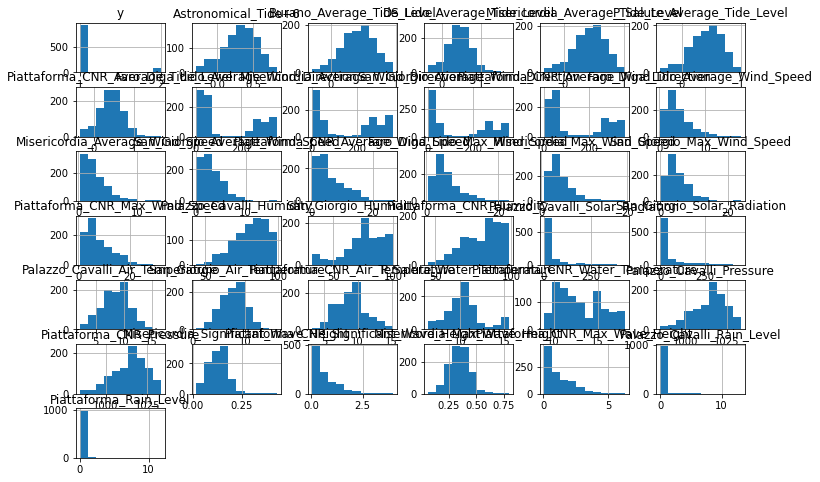

In [15]:
#Plot the histogram

train_df.hist(figsize=(12,8))
plt.show()

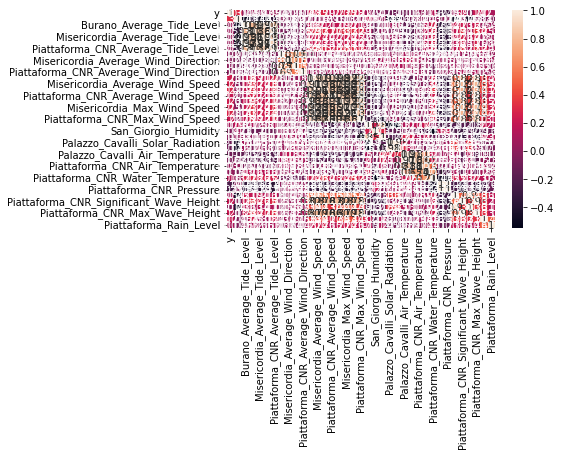

In [17]:
# Plot the correlation matrix
sns.heatmap(train_df.corr(), annot=True)
plt.show()

In [56]:
#Since the correlation matrix is unreadible, we will output the 10 more correlated variables

# Calculer la matrice de corrélation
corr_matrix = train_df.corr()

# Extraire les 4 paires de variables les plus corrélées
top_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:20:2]

# Afficher les paires de variables les plus corrélées
print(top_corr)


y                                   y                                     1.000000
DS_Lido_Average_Tide_Level          Piattaforma_CNR_Average_Tide_Level    0.998267
Piattaforma_CNR_Average_Wind_Speed  Piattaforma_CNR_Max_Wind_Speed        0.989173
Faro_Diga_Lido_Max_Wind_Speed       Faro_Diga_Lido_Average_Wind_Speed     0.984408
San_Giorgio_Max_Wind_Speed          San_Giorgio_Average_Wind_Speed        0.981021
Misericordia_Average_Wind_Speed     Misericordia_Max_Wind_Speed           0.977063
P_Salute_Average_Tide_Level         Burano_Average_Tide_Level             0.966045
Misericordia_Average_Wind_Speed     San_Giorgio_Average_Wind_Speed        0.961564
Piattaforma_CNR_Solar_Radiation     San_Giorgio_Solar_Radiation           0.956443
                                    Palazzo_Cavalli_Solar_Radiation       0.928641
dtype: float64


Following the data analysis and the visualization, I decided to test at first not to take into account the column "Piattaforma_CNR_Solar_Radiation" because of the too high number of null values. For the others, I keep the columns as a wedge and I replace the null values by 0. 

In [21]:
# Drop rows with null values
train_df.fillna(0, inplace=True)

# Check the new shape of the dataset
print(train_df.shape)

(1000, 37)


# Model Selection : Logistic Regression ? Decision Tree ? Random Forest ?

## Logistic Regression

In [22]:
#During the training of the model, I will not select the column "Piattaforma_CNR_Solar_Radiation".

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df[['Astronomical_Tide+6', 'Burano_Average_Tide_Level', 'DS_Lido_Average_Tide_Level', 'Misericordia_Average_Tide_Level', 'P_Salute_Average_Tide_Level', 'Piattaforma_CNR_Average_Tide_Level', 'Faro_Diga_Lido_Average_Wind_Direction', 'Misericordia_Average_Wind_Direction', 'San_Giorgio_Average_Wind_Direction', 'Piattaforma_CNR_Average_Wind_Direction', 'Faro_Diga_Lido_Average_Wind_Speed', 'Misericordia_Average_Wind_Speed', 'San_Giorgio_Average_Wind_Speed', 'Piattaforma_CNR_Average_Wind_Speed', 'Faro_Diga_Lido_Max_Wind_Speed', 'Misericordia_Max_Wind_Speed', 'San_Giorgio_Max_Wind_Speed', 'Piattaforma_CNR_Max_Wind_Speed', 'Palazzo_Cavalli_Humidity', 'San_Giorgio_Humidity', 'Piattaforma_CNR_Humidity', 'Palazzo_Cavalli_Solar_Radiation', 'San_Giorgio_Solar_Radiation','Palazzo_Cavalli_Air_Temperature', 'San_Giorgio_Air_Temperature', 'Piattaforma_CNR_Air_Temperature', 'P_Salute_Water_Temperature', 'Piattaforma_CNR_Water_Temperature', 'Palazzo_Cavalli_Pressure', 'Piattaforma_CNR_Pressure', 'Misericordia_Significant_Wave_Height', 'Piattaforma_CNR_Significant_Wave_Height', 'Misericordia_Max_Wave_Height', 'Piattaforma_CNR_Max_Wave_Height', 'Palazzo_Cavalli_Rain_Level', 'Piattaforma_Rain_Level']], train_df['y'], test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(solver ='lbfgs', max_iter=10000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.98      0.94       177
           2       0.56      0.22      0.31        23

    accuracy                           0.89       200
   macro avg       0.73      0.60      0.63       200
weighted avg       0.87      0.89      0.87       200



In [23]:
# Create a pipeline for scaling and logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000, random_state=42))

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Evaluate the pipeline on the test data
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       177
           2       0.75      0.52      0.62        23

    accuracy                           0.93       200
   macro avg       0.85      0.75      0.79       200
weighted avg       0.92      0.93      0.92       200



In [29]:
# We need to drop the column "Piattaforma_CNR_Solar_Radiation" because we didn't use it during the training phasis.
test_df.drop(("Piattaforma_CNR_Solar_Radiation"), axis=1, inplace=True)
test_df.fillna(0,inplace=True)
X_test = test_df

# Loading the trained model
model = Pipeline(steps=[('classifier', LogisticRegression(max_iter=10000, random_state=42))])
model.fit(X_train, y_train)

# Predict the values of "y" with the data from the test set and the model
y_pred = model.predict(X_test).tolist()

# Export the predictions to a txt file for the submission
with open('predicted_values_LogisticRegression.txt', 'w') as f:
    for pred in y_pred:
        f.write(str(pred) + '\n')

### Logistic Regression Results : 0.21

The score obtained on the data challenge site is 0.21. this is not a bad score but could be adapted. 

I tried afterwards to run the model by deleting all the null values, the score did not change significantly. 

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df[['Astronomical_Tide+6', 'Burano_Average_Tide_Level', 'DS_Lido_Average_Tide_Level', 'Misericordia_Average_Tide_Level', 'P_Salute_Average_Tide_Level', 'Piattaforma_CNR_Average_Tide_Level', 'Faro_Diga_Lido_Average_Wind_Direction', 'Misericordia_Average_Wind_Direction', 'San_Giorgio_Average_Wind_Direction', 'Piattaforma_CNR_Average_Wind_Direction', 'Faro_Diga_Lido_Average_Wind_Speed', 'Misericordia_Average_Wind_Speed', 'San_Giorgio_Average_Wind_Speed', 'Piattaforma_CNR_Average_Wind_Speed', 'Faro_Diga_Lido_Max_Wind_Speed', 'Misericordia_Max_Wind_Speed', 'San_Giorgio_Max_Wind_Speed', 'Piattaforma_CNR_Max_Wind_Speed', 'Palazzo_Cavalli_Humidity', 'San_Giorgio_Humidity', 'Piattaforma_CNR_Humidity', 'Palazzo_Cavalli_Solar_Radiation', 'San_Giorgio_Solar_Radiation','Palazzo_Cavalli_Air_Temperature', 'San_Giorgio_Air_Temperature', 'Piattaforma_CNR_Air_Temperature', 'P_Salute_Water_Temperature', 'Piattaforma_CNR_Water_Temperature', 'Palazzo_Cavalli_Pressure', 'Piattaforma_CNR_Pressure', 'Misericordia_Significant_Wave_Height', 'Piattaforma_CNR_Significant_Wave_Height', 'Misericordia_Max_Wave_Height', 'Piattaforma_CNR_Max_Wave_Height', 'Palazzo_Cavalli_Rain_Level', 'Piattaforma_Rain_Level']], train_df['y'], test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.92      1.00      0.96       177
           2       1.00      0.35      0.52        23

    accuracy                           0.93       200
   macro avg       0.96      0.67      0.74       200
weighted avg       0.93      0.93      0.91       200



In [33]:
# We need to drop the column "Piattaforma_CNR_Solar_Radiation" because we didn't use it during the training phasis.
test_df.drop(("Piattaforma_CNR_Solar_Radiation"), axis=1, inplace=True)
test_df.fillna(0,inplace=True)
X_test = test_df

# Predict the values of "y" with the data from the test set and the model
y_pred = rf.predict(X_test).tolist()

# Export the predictions to a txt file for the submission
with open('predicted_values_RandomForest.txt', 'w') as f:
    for pred in y_pred:
        f.write(str(pred) + '\n')

### Random Forest Results : 0.17

The score obtained on the data challenge site is 0.17. this is not a bad score but could be adapted. 

I tried afterwards to run the model by deleting all the null values, the score did not change significantly. 

## Decision Tree

In [4]:
# Drop rows with null values
train_df.fillna(0, inplace=True)

# Check the new shape of the dataset
print(train_df.shape)

(1000, 38)


In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df[['Astronomical_Tide+6', 'Burano_Average_Tide_Level', 'DS_Lido_Average_Tide_Level', 'Misericordia_Average_Tide_Level', 'P_Salute_Average_Tide_Level', 'Piattaforma_CNR_Average_Tide_Level', 'Faro_Diga_Lido_Average_Wind_Direction', 'Misericordia_Average_Wind_Direction', 'San_Giorgio_Average_Wind_Direction', 'Piattaforma_CNR_Average_Wind_Direction', 'Faro_Diga_Lido_Average_Wind_Speed', 'Misericordia_Average_Wind_Speed', 'San_Giorgio_Average_Wind_Speed', 'Piattaforma_CNR_Average_Wind_Speed', 'Faro_Diga_Lido_Max_Wind_Speed', 'Misericordia_Max_Wind_Speed', 'San_Giorgio_Max_Wind_Speed', 'Piattaforma_CNR_Max_Wind_Speed', 'Palazzo_Cavalli_Humidity', 'San_Giorgio_Humidity', 'Piattaforma_CNR_Humidity', 'Palazzo_Cavalli_Solar_Radiation', 'San_Giorgio_Solar_Radiation','Palazzo_Cavalli_Air_Temperature', 'San_Giorgio_Air_Temperature', 'Piattaforma_CNR_Air_Temperature', 'P_Salute_Water_Temperature', 'Piattaforma_CNR_Water_Temperature', 'Palazzo_Cavalli_Pressure', 'Piattaforma_CNR_Pressure', 'Misericordia_Significant_Wave_Height', 'Piattaforma_CNR_Significant_Wave_Height', 'Misericordia_Max_Wave_Height', 'Piattaforma_CNR_Max_Wave_Height', 'Palazzo_Cavalli_Rain_Level', 'Piattaforma_Rain_Level']], train_df['y'], test_size=0.2, random_state=42)

#We are not taking the column "Piattaforma_CNR_Solar_Radiation" because it is has too much null variable.

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       177
           2       0.77      0.74      0.76        23

    accuracy                           0.94       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.94      0.94      0.94       200



In [6]:
# load the test data
test_df.drop(("Piattaforma_CNR_Solar_Radiation"), axis=1, inplace=True)
test_df.fillna(0,inplace=True)

# extract the features and target variables
X_test = test_df

# create the decision tree classifier model
#clf = DecisionTreeClassifier()

# fit the model on the training data
clf.fit(X_train, y_train)

# generate predictions for the test data
y_pred = clf.predict(X_test)

# write the predicted values to a text file
with open('predicted_values_DecisionTree.txt', 'w') as f:
    for y in y_pred:
        f.write(str(y) + '\n')

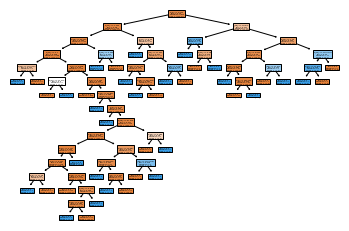

In [7]:
plot_tree(clf, filled=True)
plt.show()

In [10]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f%%)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]*100))


Feature ranking:
1. Astronomical_Tide+6 (14.175830%)
2. Palazzo_Cavalli_Pressure (12.910921%)
3. Piattaforma_CNR_Pressure (9.342000%)
4. Faro_Diga_Lido_Average_Wind_Speed (7.781288%)
5. Misericordia_Average_Wind_Speed (6.106545%)
6. San_Giorgio_Average_Wind_Speed (5.873402%)
7. Piattaforma_CNR_Water_Temperature (5.696422%)
8. P_Salute_Water_Temperature (5.383282%)
9. Misericordia_Significant_Wave_Height (4.099973%)
10. Palazzo_Cavalli_Humidity (3.630876%)
11. Piattaforma_CNR_Average_Tide_Level (3.540244%)
12. Palazzo_Cavalli_Air_Temperature (3.514094%)
13. Piattaforma_CNR_Humidity (3.412887%)
14. P_Salute_Average_Tide_Level (3.360215%)
15. Piattaforma_CNR_Average_Wind_Direction (2.477568%)
16. Piattaforma_CNR_Significant_Wave_Height (1.864189%)
17. Piattaforma_CNR_Max_Wave_Height (1.836639%)
18. Misericordia_Max_Wave_Height (1.440092%)
19. Faro_Diga_Lido_Average_Wind_Direction (1.280082%)
20. San_Giorgio_Average_Wind_Direction (1.100993%)
21. Misericordia_Average_Wind_Direction (0.8851

### Decison Tree Results : 0.15

Here we see that the Decision Tree model is much closer to a correct score. 

We must now see what we can do to improve this model

## Best Model : Decision Tree. We need to improve it

I am gonna try to delete all the null values after droping the column "Piattaforma_CNR_Solar_Radiation".

In [12]:
train_df = pd.read_csv('train.csv')
#train_df.drop(("Piattaforma_CNR_Solar_Radiation"), axis=1, inplace=True)
train_df.dropna(inplace=True)
print(train_df.shape)

(519, 38)


In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df[['Astronomical_Tide+6', 'Burano_Average_Tide_Level', 'DS_Lido_Average_Tide_Level', 'Misericordia_Average_Tide_Level', 'P_Salute_Average_Tide_Level', 'Piattaforma_CNR_Average_Tide_Level', 'Faro_Diga_Lido_Average_Wind_Direction', 'Misericordia_Average_Wind_Direction', 'San_Giorgio_Average_Wind_Direction', 'Piattaforma_CNR_Average_Wind_Direction', 'Faro_Diga_Lido_Average_Wind_Speed', 'Misericordia_Average_Wind_Speed', 'San_Giorgio_Average_Wind_Speed', 'Piattaforma_CNR_Average_Wind_Speed', 'Faro_Diga_Lido_Max_Wind_Speed', 'Misericordia_Max_Wind_Speed', 'San_Giorgio_Max_Wind_Speed', 'Piattaforma_CNR_Max_Wind_Speed', 'Palazzo_Cavalli_Humidity', 'San_Giorgio_Humidity', 'Piattaforma_CNR_Humidity', 'Palazzo_Cavalli_Solar_Radiation', 'San_Giorgio_Solar_Radiation','Palazzo_Cavalli_Air_Temperature', 'San_Giorgio_Air_Temperature', 'Piattaforma_CNR_Air_Temperature', 'P_Salute_Water_Temperature', 'Piattaforma_CNR_Water_Temperature', 'Palazzo_Cavalli_Pressure', 'Piattaforma_CNR_Pressure', 'Misericordia_Significant_Wave_Height', 'Piattaforma_CNR_Significant_Wave_Height', 'Misericordia_Max_Wave_Height', 'Piattaforma_CNR_Max_Wave_Height', 'Palazzo_Cavalli_Rain_Level', 'Piattaforma_Rain_Level']], train_df['y'], test_size=0.2, random_state=42)

#We are not taking the column "Piattaforma_CNR_Solar_Radiation" because it is has too much null variable.

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98       101
           2       0.50      1.00      0.67         3

    accuracy                           0.97       104
   macro avg       0.75      0.99      0.83       104
weighted avg       0.99      0.97      0.98       104



I notice that removing the rows with zero values lowers the accuracy of my model on the y = 2 group. 

So I have to keep the maximum number of lines. This is logical because the Decisiontree model needs the maximum number of data possible. 

I will now try to decrease the number of columns, for example those with zero vamleures and then those with large correlations between them.

In [14]:
columns_to_drop = ["San_Giorgio_Average_Wind_Direction","San_Giorgio_Average_Wind_Speed","San_Giorgio_Max_Wind_Speed","San_Giorgio_Humidity","Palazzo_Cavalli_Solar_Radiation","San_Giorgio_Solar_Radiation","San_Giorgio_Air_Temperature","Piattaforma_CNR_Solar_Radiation"]
train_df.drop(columns_to_drop, axis=1, inplace=True)
print(train_df.shape)

(519, 30)


In [15]:
def prepare_list_for_model(original_list, list_to_drop):

    for elem in list_to_drop:
        if elem in original_list:
            original_list.remove(elem)

    print(original_list)

liste1 = ['Astronomical_Tide+6', 'Burano_Average_Tide_Level', 'DS_Lido_Average_Tide_Level', 'Misericordia_Average_Tide_Level', 'P_Salute_Average_Tide_Level', 'Piattaforma_CNR_Average_Tide_Level', 'Faro_Diga_Lido_Average_Wind_Direction', 'Misericordia_Average_Wind_Direction', 'San_Giorgio_Average_Wind_Direction', 'Piattaforma_CNR_Average_Wind_Direction', 'Faro_Diga_Lido_Average_Wind_Speed', 'Misericordia_Average_Wind_Speed', 'San_Giorgio_Average_Wind_Speed', 'Piattaforma_CNR_Average_Wind_Speed', 'Faro_Diga_Lido_Max_Wind_Speed', 'Misericordia_Max_Wind_Speed', 'San_Giorgio_Max_Wind_Speed', 'Piattaforma_CNR_Max_Wind_Speed', 'Palazzo_Cavalli_Humidity', 'San_Giorgio_Humidity', 'Piattaforma_CNR_Humidity', 'Palazzo_Cavalli_Solar_Radiation', 'San_Giorgio_Solar_Radiation','Palazzo_Cavalli_Air_Temperature', 'San_Giorgio_Air_Temperature', 'Piattaforma_CNR_Air_Temperature', 'P_Salute_Water_Temperature', 'Piattaforma_CNR_Water_Temperature', 'Palazzo_Cavalli_Pressure', 'Piattaforma_CNR_Pressure', 'Misericordia_Significant_Wave_Height', 'Piattaforma_CNR_Significant_Wave_Height', 'Misericordia_Max_Wave_Height', 'Piattaforma_CNR_Max_Wave_Height', 'Palazzo_Cavalli_Rain_Level', 'Piattaforma_Rain_Level']
liste2 = ["San_Giorgio_Average_Wind_Direction","San_Giorgio_Average_Wind_Speed","San_Giorgio_Max_Wind_Speed","San_Giorgio_Humidity","Palazzo_Cavalli_Solar_Radiation","San_Giorgio_Solar_Radiation","San_Giorgio_Air_Temperature","Piattaforma_CNR_Solar_Radiation"]
prepare_list_for_model(liste1,liste2)

['Astronomical_Tide+6', 'Burano_Average_Tide_Level', 'DS_Lido_Average_Tide_Level', 'Misericordia_Average_Tide_Level', 'P_Salute_Average_Tide_Level', 'Piattaforma_CNR_Average_Tide_Level', 'Faro_Diga_Lido_Average_Wind_Direction', 'Misericordia_Average_Wind_Direction', 'Piattaforma_CNR_Average_Wind_Direction', 'Faro_Diga_Lido_Average_Wind_Speed', 'Misericordia_Average_Wind_Speed', 'Piattaforma_CNR_Average_Wind_Speed', 'Faro_Diga_Lido_Max_Wind_Speed', 'Misericordia_Max_Wind_Speed', 'Piattaforma_CNR_Max_Wind_Speed', 'Palazzo_Cavalli_Humidity', 'Piattaforma_CNR_Humidity', 'Palazzo_Cavalli_Air_Temperature', 'Piattaforma_CNR_Air_Temperature', 'P_Salute_Water_Temperature', 'Piattaforma_CNR_Water_Temperature', 'Palazzo_Cavalli_Pressure', 'Piattaforma_CNR_Pressure', 'Misericordia_Significant_Wave_Height', 'Piattaforma_CNR_Significant_Wave_Height', 'Misericordia_Max_Wave_Height', 'Piattaforma_CNR_Max_Wave_Height', 'Palazzo_Cavalli_Rain_Level', 'Piattaforma_Rain_Level']


In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df[['Astronomical_Tide+6', 'Burano_Average_Tide_Level', 'DS_Lido_Average_Tide_Level', 'Misericordia_Average_Tide_Level', 'P_Salute_Average_Tide_Level', 'Piattaforma_CNR_Average_Tide_Level', 'Faro_Diga_Lido_Average_Wind_Direction', 'Misericordia_Average_Wind_Direction', 'Piattaforma_CNR_Average_Wind_Direction', 'Faro_Diga_Lido_Average_Wind_Speed', 'Misericordia_Average_Wind_Speed', 'Piattaforma_CNR_Average_Wind_Speed', 'Faro_Diga_Lido_Max_Wind_Speed', 'Misericordia_Max_Wind_Speed', 'Piattaforma_CNR_Max_Wind_Speed', 'Palazzo_Cavalli_Humidity', 'Piattaforma_CNR_Humidity', 'Palazzo_Cavalli_Air_Temperature', 'Piattaforma_CNR_Air_Temperature', 'P_Salute_Water_Temperature', 'Piattaforma_CNR_Water_Temperature', 'Palazzo_Cavalli_Pressure', 'Piattaforma_CNR_Pressure', 'Misericordia_Significant_Wave_Height', 'Piattaforma_CNR_Significant_Wave_Height', 'Misericordia_Max_Wave_Height', 'Piattaforma_CNR_Max_Wave_Height', 'Palazzo_Cavalli_Rain_Level', 'Piattaforma_Rain_Level']], train_df['y'], test_size=0.2, random_state=42)

#We are not taking the column "Piattaforma_CNR_Solar_Radiation" because it is has too much null variable.

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.95      0.97       101
           2       0.29      0.67      0.40         3

    accuracy                           0.94       104
   macro avg       0.64      0.81      0.68       104
weighted avg       0.97      0.94      0.95       104



The results are not better despite the removal of columns with zero values

We will now remove the columns that are highly correlated

In [60]:
liste1 = ['Astronomical_Tide+6', 'Burano_Average_Tide_Level', 'DS_Lido_Average_Tide_Level', 'Misericordia_Average_Tide_Level', 'P_Salute_Average_Tide_Level', 'Piattaforma_CNR_Average_Tide_Level', 'Faro_Diga_Lido_Average_Wind_Direction', 'Misericordia_Average_Wind_Direction', 'San_Giorgio_Average_Wind_Direction', 'Piattaforma_CNR_Average_Wind_Direction', 'Faro_Diga_Lido_Average_Wind_Speed', 'Misericordia_Average_Wind_Speed', 'San_Giorgio_Average_Wind_Speed', 'Piattaforma_CNR_Average_Wind_Speed', 'Faro_Diga_Lido_Max_Wind_Speed', 'Misericordia_Max_Wind_Speed', 'San_Giorgio_Max_Wind_Speed', 'Piattaforma_CNR_Max_Wind_Speed', 'Palazzo_Cavalli_Humidity', 'San_Giorgio_Humidity', 'Piattaforma_CNR_Humidity', 'Palazzo_Cavalli_Solar_Radiation', 'San_Giorgio_Solar_Radiation','Palazzo_Cavalli_Air_Temperature', 'San_Giorgio_Air_Temperature', 'Piattaforma_CNR_Air_Temperature', 'P_Salute_Water_Temperature', 'Piattaforma_CNR_Water_Temperature', 'Palazzo_Cavalli_Pressure', 'Piattaforma_CNR_Pressure', 'Misericordia_Significant_Wave_Height', 'Piattaforma_CNR_Significant_Wave_Height', 'Misericordia_Max_Wave_Height', 'Piattaforma_CNR_Max_Wave_Height', 'Palazzo_Cavalli_Rain_Level', 'Piattaforma_Rain_Level']
top_corr = ['DS_Lido_Average_Tide_Level','Piattaforma_CNR_Average_Tide_Level','Piattaforma_CNR_Average_Wind_Speed','Piattaforma_CNR_Max_Wind_Speed','Faro_Diga_Lido_Max_Wind_Speed','Faro_Diga_Lido_Average_Wind_Speed','San_Giorgio_Max_Wind_Speed','San_Giorgio_Average_Wind_Speed']

prepare_list_for_model(liste1,top_corr)

train_df.fillna(0, inplace=True)

['Astronomical_Tide+6', 'Burano_Average_Tide_Level', 'Misericordia_Average_Tide_Level', 'P_Salute_Average_Tide_Level', 'Faro_Diga_Lido_Average_Wind_Direction', 'Misericordia_Average_Wind_Direction', 'San_Giorgio_Average_Wind_Direction', 'Piattaforma_CNR_Average_Wind_Direction', 'Misericordia_Average_Wind_Speed', 'Misericordia_Max_Wind_Speed', 'Palazzo_Cavalli_Humidity', 'San_Giorgio_Humidity', 'Piattaforma_CNR_Humidity', 'Palazzo_Cavalli_Solar_Radiation', 'San_Giorgio_Solar_Radiation', 'Palazzo_Cavalli_Air_Temperature', 'San_Giorgio_Air_Temperature', 'Piattaforma_CNR_Air_Temperature', 'P_Salute_Water_Temperature', 'Piattaforma_CNR_Water_Temperature', 'Palazzo_Cavalli_Pressure', 'Piattaforma_CNR_Pressure', 'Misericordia_Significant_Wave_Height', 'Piattaforma_CNR_Significant_Wave_Height', 'Misericordia_Max_Wave_Height', 'Piattaforma_CNR_Max_Wave_Height', 'Palazzo_Cavalli_Rain_Level', 'Piattaforma_Rain_Level']


In [21]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df[['Astronomical_Tide+6', 'Burano_Average_Tide_Level', 'Misericordia_Average_Tide_Level', 'P_Salute_Average_Tide_Level', 'Faro_Diga_Lido_Average_Wind_Direction', 'Misericordia_Average_Wind_Direction', 'San_Giorgio_Average_Wind_Direction', 'Piattaforma_CNR_Average_Wind_Direction', 'Misericordia_Average_Wind_Speed', 'Misericordia_Max_Wind_Speed', 'Palazzo_Cavalli_Humidity', 'San_Giorgio_Humidity', 'Piattaforma_CNR_Humidity', 'Palazzo_Cavalli_Solar_Radiation', 'San_Giorgio_Solar_Radiation', 'Palazzo_Cavalli_Air_Temperature', 'San_Giorgio_Air_Temperature', 'Piattaforma_CNR_Air_Temperature', 'P_Salute_Water_Temperature', 'Piattaforma_CNR_Water_Temperature', 'Palazzo_Cavalli_Pressure', 'Piattaforma_CNR_Pressure', 'Misericordia_Significant_Wave_Height', 'Piattaforma_CNR_Significant_Wave_Height', 'Misericordia_Max_Wave_Height', 'Piattaforma_CNR_Max_Wave_Height', 'Palazzo_Cavalli_Rain_Level', 'Piattaforma_Rain_Level']], train_df['y'], test_size=0.2, random_state=42)

#We are not taking the column "Piattaforma_CNR_Solar_Radiation" because it is has too much null variable.

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.94      0.94       177
           2       0.56      0.61      0.58        23

    accuracy                           0.90       200
   macro avg       0.75      0.77      0.76       200
weighted avg       0.90      0.90      0.90       200



Each time we delete data, the accuracy of the model decreases. We will now try to modify the parameters of the model with the most efficient trainet: delete the column "Piattaforma_CNR_Solar_Radiation" and replace the null values by 0

### DecisionTree calibration testing

In [22]:
# Drop rows with null values
train_df.fillna(0, inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df[['Astronomical_Tide+6', 'Burano_Average_Tide_Level', 'DS_Lido_Average_Tide_Level', 'Misericordia_Average_Tide_Level', 'P_Salute_Average_Tide_Level', 'Piattaforma_CNR_Average_Tide_Level', 'Faro_Diga_Lido_Average_Wind_Direction', 'Misericordia_Average_Wind_Direction', 'San_Giorgio_Average_Wind_Direction', 'Piattaforma_CNR_Average_Wind_Direction', 'Faro_Diga_Lido_Average_Wind_Speed', 'Misericordia_Average_Wind_Speed', 'San_Giorgio_Average_Wind_Speed', 'Piattaforma_CNR_Average_Wind_Speed', 'Faro_Diga_Lido_Max_Wind_Speed', 'Misericordia_Max_Wind_Speed', 'San_Giorgio_Max_Wind_Speed', 'Piattaforma_CNR_Max_Wind_Speed', 'Palazzo_Cavalli_Humidity', 'San_Giorgio_Humidity', 'Piattaforma_CNR_Humidity', 'Palazzo_Cavalli_Solar_Radiation', 'San_Giorgio_Solar_Radiation','Palazzo_Cavalli_Air_Temperature', 'San_Giorgio_Air_Temperature', 'Piattaforma_CNR_Air_Temperature', 'P_Salute_Water_Temperature', 'Piattaforma_CNR_Water_Temperature', 'Palazzo_Cavalli_Pressure', 'Piattaforma_CNR_Pressure', 'Misericordia_Significant_Wave_Height', 'Piattaforma_CNR_Significant_Wave_Height', 'Misericordia_Max_Wave_Height', 'Piattaforma_CNR_Max_Wave_Height', 'Palazzo_Cavalli_Rain_Level', 'Piattaforma_Rain_Level']], train_df['y'], test_size=0.2, random_state=42)

#We are not taking the column "Piattaforma_CNR_Solar_Radiation" because it is has too much null variable.

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.97      0.97      0.97       177
           2       0.77      0.74      0.76        23

    accuracy                           0.94       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.94      0.94      0.94       200



In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
              'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Create a Decision Tree classifier object
dt_clf = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object to search across the parameter grid
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)



Best parameters found:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 20}


In [11]:
#Application of the new parameters 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df[['Astronomical_Tide+6', 'Burano_Average_Tide_Level', 'DS_Lido_Average_Tide_Level', 'Misericordia_Average_Tide_Level', 'P_Salute_Average_Tide_Level', 'Piattaforma_CNR_Average_Tide_Level', 'Faro_Diga_Lido_Average_Wind_Direction', 'Misericordia_Average_Wind_Direction', 'San_Giorgio_Average_Wind_Direction', 'Piattaforma_CNR_Average_Wind_Direction', 'Faro_Diga_Lido_Average_Wind_Speed', 'Misericordia_Average_Wind_Speed', 'San_Giorgio_Average_Wind_Speed', 'Piattaforma_CNR_Average_Wind_Speed', 'Faro_Diga_Lido_Max_Wind_Speed', 'Misericordia_Max_Wind_Speed', 'San_Giorgio_Max_Wind_Speed', 'Piattaforma_CNR_Max_Wind_Speed', 'Palazzo_Cavalli_Humidity', 'San_Giorgio_Humidity', 'Piattaforma_CNR_Humidity', 'Palazzo_Cavalli_Solar_Radiation', 'San_Giorgio_Solar_Radiation','Palazzo_Cavalli_Air_Temperature', 'San_Giorgio_Air_Temperature', 'Piattaforma_CNR_Air_Temperature', 'P_Salute_Water_Temperature', 'Piattaforma_CNR_Water_Temperature', 'Palazzo_Cavalli_Pressure', 'Piattaforma_CNR_Pressure', 'Misericordia_Significant_Wave_Height', 'Piattaforma_CNR_Significant_Wave_Height', 'Misericordia_Max_Wave_Height', 'Piattaforma_CNR_Max_Wave_Height', 'Palazzo_Cavalli_Rain_Level', 'Piattaforma_Rain_Level']], train_df['y'], test_size=0.2, random_state=42)

#We are not taking the column "Piattaforma_CNR_Solar_Radiation" because it is has too much null variable.

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_split = 20, min_samples_leaf = 8, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       177
           2       0.80      0.52      0.63        23

    accuracy                           0.93       200
   macro avg       0.87      0.75      0.80       200
weighted avg       0.92      0.93      0.92       200



As a result of this parameterization, we have significantly increased our accuracy for the accuracy of the second class (y = 2) but the prediction of the first class has slightly decreased (0.03). 

y = 2 represents the hight tides. Increasing the accuracy on the y = 2 class will allow us to be more accurate on the prediction of high tides even if we lose slightly on the prediction of low tides. 



In [26]:
# load the test data
test_df.drop(("Piattaforma_CNR_Solar_Radiation"), axis=1, inplace=True)
test_df.fillna(0,inplace=True)

# extract the features and target variables
X_test = test_df

# fit the model on the training data
clf.fit(X_train, y_train)

# generate predictions for the test data
y_pred = clf.predict(X_test)

# write the predicted values to a text file
with open('predicted_values_DecisionTree_calibrated.txt', 'w') as f:
    for y in y_pred:
        f.write(str(y) + '\n')

In [12]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f%%)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]*100))


Feature ranking:
1. Astronomical_Tide+6 (25.165949%)
2. Palazzo_Cavalli_Pressure (23.795486%)
3. Faro_Diga_Lido_Average_Wind_Speed (13.092830%)
4. Piattaforma_CNR_Max_Wind_Speed (13.064245%)
5. San_Giorgio_Average_Wind_Speed (12.611220%)
6. Palazzo_Cavalli_Humidity (4.029604%)
7. Palazzo_Cavalli_Air_Temperature (3.611297%)
8. Piattaforma_CNR_Water_Temperature (3.392518%)
9. Piattaforma_CNR_Average_Wind_Speed (1.236852%)
10. DS_Lido_Average_Tide_Level (0.000000%)
11. Misericordia_Average_Tide_Level (0.000000%)
12. P_Salute_Average_Tide_Level (0.000000%)
13. Piattaforma_CNR_Average_Tide_Level (0.000000%)
14. Faro_Diga_Lido_Average_Wind_Direction (0.000000%)
15. Misericordia_Average_Wind_Direction (0.000000%)
16. San_Giorgio_Average_Wind_Direction (0.000000%)
17. Piattaforma_CNR_Average_Wind_Direction (0.000000%)
18. Burano_Average_Tide_Level (0.000000%)
19. Piattaforma_CNR_Max_Wave_Height (0.000000%)
20. Misericordia_Average_Wind_Speed (0.000000%)
21. Piattaforma_CNR_Significant_Wave_Hei

### Decision Tree calibrated Results : 0,13

We can see here that we have gained in accuracy on the model in general according to the notation mode and the constraints imposed by the corrector

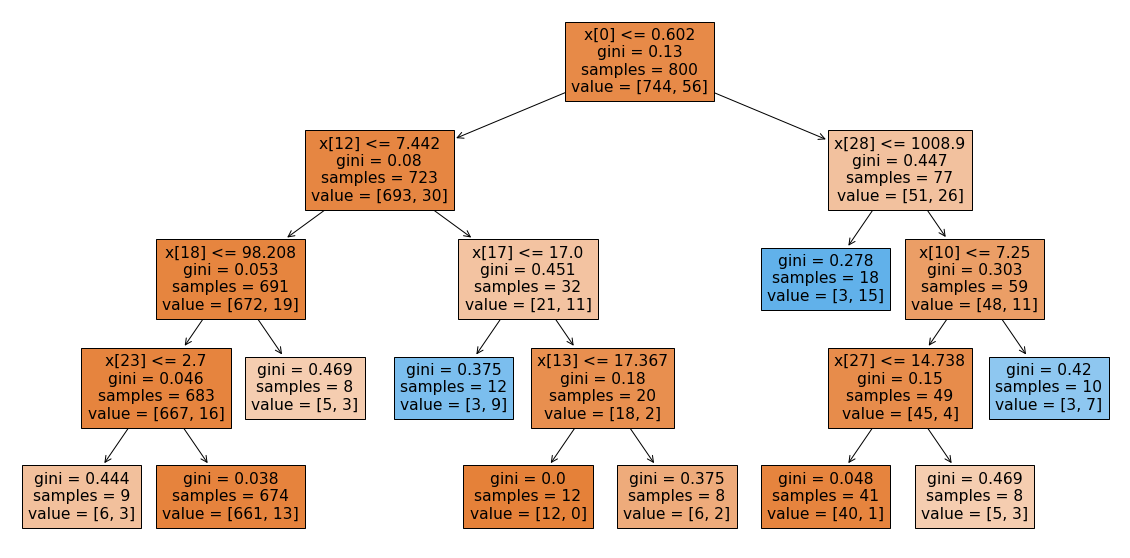

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True)
plt.show()
